In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

## Import test and train files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data pre processing before creating a model

##### Imputing missing values

In [4]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [5]:
train['Outlet_Establishment_Year'] = 2017 - train['Outlet_Establishment_Year']

In [6]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [7]:
train['Item_Weight'].fillna(np.mean(train['Item_Weight']),inplace=True)

#### Creating dummy variables to convert categorical into numeric values

In [8]:
mylist = list(train.select_dtypes(include=['object']).columns)
mylist

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
dummies = pd.get_dummies(train[['Outlet_Location_Type','Outlet_Type','Outlet_Size']], prefix = 'mylist')

In [10]:
train.drop(mylist, axis=1, inplace = True)

In [11]:
X = pd.concat([train,dummies], axis =1 )

In [12]:
X.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,mylist_Tier 1,mylist_Tier 2,mylist_Tier 3,mylist_Grocery Store,mylist_Supermarket Type1,mylist_Supermarket Type2,mylist_Supermarket Type3,mylist_High,mylist_Medium,mylist_Small
0,9.300000,0.016047,249.8092,18,3735.1380,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.920000,0.019278,48.2692,8,443.4228,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500000,0.016760,141.6180,18,2097.2700,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,19.200000,0.066132,182.0950,19,732.3800,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.930000,0.066132,53.8614,30,994.7052,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,10.395000,0.066132,51.4008,8,556.6088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,13.650000,0.012741,57.6588,30,343.5528,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,12.857645,0.127470,107.7622,32,4022.7636,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,16.200000,0.016687,96.9726,15,1076.5986,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,19.200000,0.094450,187.8214,10,4710.5350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Creating the model

#### Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

#### Split the data into training and cross verification sets

In [14]:
train.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,18,3735.1380
1,5.920000,0.019278,48.2692,8,443.4228
2,17.500000,0.016760,141.6180,18,2097.2700
3,19.200000,0.066132,182.0950,19,732.3800
4,8.930000,0.066132,53.8614,30,994.7052
5,10.395000,0.066132,51.4008,8,556.6088
6,13.650000,0.012741,57.6588,30,343.5528
7,12.857645,0.127470,107.7622,32,4022.7636
8,16.200000,0.016687,96.9726,15,1076.5986
9,19.200000,0.094450,187.8214,10,4710.5350


In [15]:
X.drop('Item_Outlet_Sales', axis=1, inplace=True)

In [16]:
X.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,mylist_Tier 1,mylist_Tier 2,mylist_Tier 3,mylist_Grocery Store,mylist_Supermarket Type1,mylist_Supermarket Type2,mylist_Supermarket Type3,mylist_High,mylist_Medium,mylist_Small
0,9.300000,0.016047,249.8092,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.920000,0.019278,48.2692,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500000,0.016760,141.6180,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,19.200000,0.066132,182.0950,19,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.930000,0.066132,53.8614,30,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,10.395000,0.066132,51.4008,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,13.650000,0.012741,57.6588,30,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,12.857645,0.127470,107.7622,32,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,16.200000,0.016687,96.9726,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,19.200000,0.094450,187.8214,10,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [18]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pred_cv = lreg.predict(x_cv)
pred_cv

array([ 1915.53373046,  2810.23016457,  1566.98110261, ...,  -497.81864612,
        1127.80980437,  2123.20308519])

##### Calculating MSE

In [20]:
mse = np.mean((pred_cv - y_cv)**2)
mse

1271103.9031594736

##### Evaluating R-Square

In [21]:
lreg.score(x_cv,y_cv)

0.56421988639663168

##### The R-squared value of 56% tells that the model is able to predict 56% more closer values to the actual values.

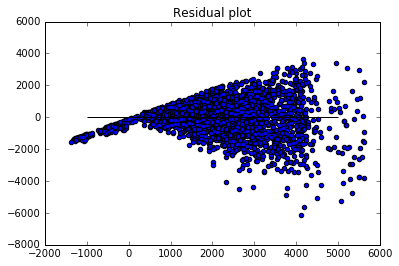

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


x_plot = plt.scatter(pred_cv, (pred_cv - y_cv))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

The plot above is a plot between the error in predicted  sales. We can clearly see that the variance of error terms(residuals) is not constant. This is known as <b>Heteroskedasticity</b>. This occurs in the presence of outliers. Outliers get unnecessary weight thus misguiding the model.

#### Lets check for the coeffifcients of different variables for the data

In [23]:
x_train.columns

Index([u'Item_Weight', u'Item_Visibility', u'Item_MRP',
       u'Outlet_Establishment_Year', u'mylist_Tier 1', u'mylist_Tier 2',
       u'mylist_Tier 3', u'mylist_Grocery Store', u'mylist_Supermarket Type1',
       u'mylist_Supermarket Type2', u'mylist_Supermarket Type3',
       u'mylist_High', u'mylist_Medium', u'mylist_Small'],
      dtype='object')

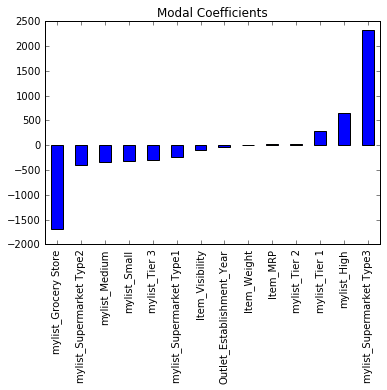

In [24]:
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [25]:
coef

mylist_Grocery Store        -1685.157695
mylist_Supermarket Type2     -398.949054
mylist_Medium                -344.984600
mylist_Small                 -308.266288
mylist_Tier 3                -298.067461
mylist_Supermarket Type1     -233.728136
Item_Visibility               -96.050209
Outlet_Establishment_Year     -41.176851
Item_Weight                    -2.348437
Item_MRP                       15.484119
mylist_Tier 2                  18.454451
mylist_Tier 1                 279.613009
mylist_High                   653.250888
mylist_Supermarket Type3     2317.834885
dtype: float64

We notice that the coefficients of 'mylist_Grocery Store' and 'mylist_Supermarket Type3' are the outliers, thus misguiding the model. The total sales of an item gets effected by these two values.

To reduce the effect of outliers, we <b>Regularize</b> the coefficients. 

### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [49]:
ridgReg = Ridge(alpha=0.05, normalize=True) #for different values of alpha, replace here for values .05, 5, 10
ridgReg.fit(x_train, y_train)
ridge_pred = ridgReg.predict(x_cv)

In [34]:
predictors = x_train.columns
coef = Series(ridgReg.coef_,predictors).sort_values()

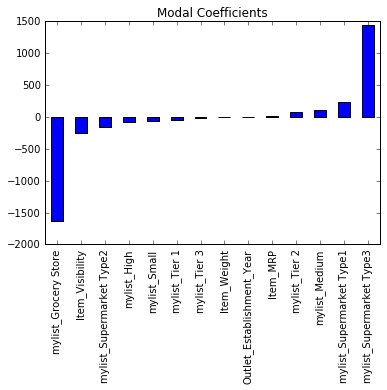

In [35]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha = 0.05

R-Square at alpha = 0.05

In [50]:
ridgReg.score(x_cv, y_cv)

0.56475090807383066

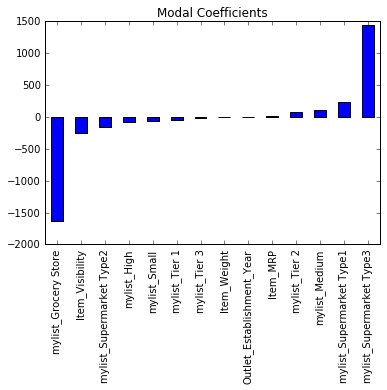

In [37]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha = 5

R-Square at alpha = 5

In [46]:
ridgReg.score(x_cv, y_cv)

0.20166905295621707

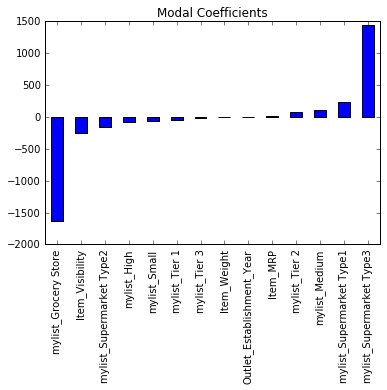

In [39]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha = 10

R-Square at alpha = 10

In [48]:
ridgReg.score(x_cv, y_cv)

0.1191426472020457

We note that the increasing values of alpha keeps the coefficients normalized. But on the other hand, R-Square value takes a dip with the increase in the alpha value.

Hence, we need to iterate through a series of values of alpha to find the minimum trade off. 

#### Now lets consider another type of regression which also uses regularization.

### Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

In [62]:
lassoReg = Lasso(alpha=0.5, normalize=True) #for different values of alpha, replace here for values 0.3, 0.05, 0.5
lassoReg.fit(x_train,y_train)
lassoPred = lassoReg.predict(x_cv)

Calculating MSE

In [53]:
mse = np.mean((lassoPred - y_cv)**2)
mse

1270141.0302798438

In [ ]:
predictors = x_train.columns
coef = Series(lassoReg.coef_,predictors).sort_values()

#### R-Square and coefficient plots at different values of alpha

Alpha = 0.3

In [57]:
lassoReg.score(x_cv, y_cv)

0.56454999383460636

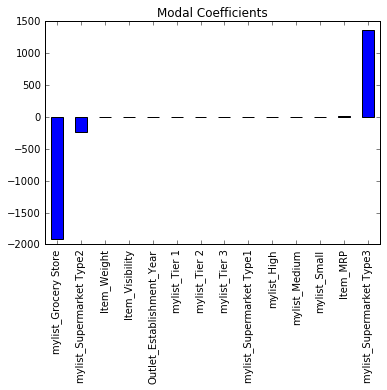

In [56]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha = 0.3

Alpha = 0.05

In [60]:
lassoReg.score(x_cv, y_cv)

0.56464938464402625

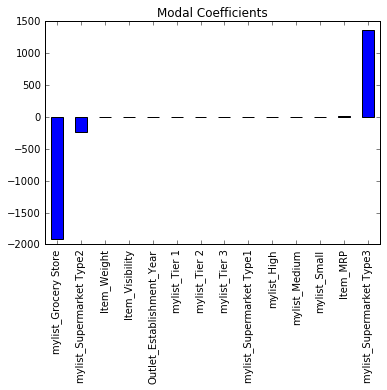

In [61]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha=0.05

Alpha = 0.5

In [63]:
lassoReg.score(x_cv, y_cv)

0.56349535223972591

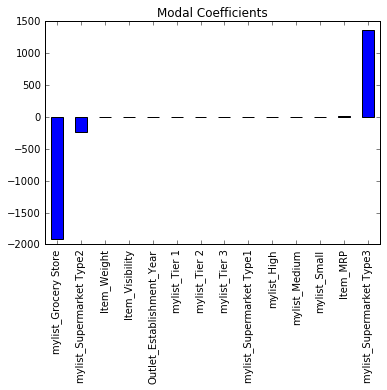

In [64]:
coef.plot(kind='bar', title='Modal Coefficients') #alpha=0.5

We notice that, at smaller values of alpha also, the coefficents tend to approach zero which was not the case with ridge regression. Thus, lasso selects a few features while reduces the coefficients of others to zero.  
This property is known as <b><i>Feature Selection</i></b>. This is absent in case of ridge.

Now lets think of a large dataset which has 10000 features. Some of the independent variables may be related to each other in this case.

Lets discuss the scenario for the above two regressions.

In case of Ridge Regression, it will retain all the features and will regularize the coefficients. But the model will still be complex.
On the other hand, Lasso will select one independent variable out of the model and reduce the rest of the corelated variables to zero. This may lead to loss of information and a lower accuracy.

So, we take a look at another type of regression : <b> Elastic Net Regression </b>

### Elastic Net Regression

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
enReg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

In [68]:
enReg.fit(x_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
enRegPred = enReg.predict(x_cv)

Calculate MSE and R-Square

In [71]:
mse = np.mean((enRegPred - y_cv)**2)
mse

1568888.0979243978

In [72]:
enReg.score(x_cv, y_cv)

0.4621287592264679

Here, we notice that R-Sqaure value is lower than what we saw in case of Lasso and Ridge regressions. This is because Elastic Net regression performs better when the data is big